# Plots of Watershed Algorithm on Comet

In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4).pprint

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

def merge_dicts(x, y):
    z = x.copy()   # start with x's keys and values
    z.update(y)    # modifies z with y's keys and values & returns None
    return z

Calculate the mean and standard deviation of Pilot execution times

In [2]:
folder      = 'watershed_rp_20to29_data'
weak_data   = 'watershed_rp_weak_20to29.csv'
strong_data = 'watershed_rp_strong_20to29.csv'

# all_columns=['Nodes','Framework','Duration','Json']
columns=['Nodes', 'Duration']

raw_weakdf   = pd.read_csv(os.path.join(folder, weak_data))[columns]
raw_strongdf = pd.read_csv(os.path.join(folder, strong_data))[columns]

weakgroup = raw_weakdf.groupby('Nodes').describe().reset_index()
weakdf = pd.DataFrame(
    {'Nodes' : weakgroup['Nodes'],
     'mean'  : weakgroup[('Duration', 'mean')],
     'std'   : weakgroup[('Duration', 'std')]
    }
)

stronggroup = raw_strongdf.groupby('Nodes').describe().reset_index()
strongdf = pd.DataFrame(
    {'Nodes' : stronggroup['Nodes'],
     'mean'  : stronggroup[('Duration', 'mean')],
     'std'   : stronggroup[('Duration', 'std')]
    }
)

Plot mean Pilot execution times

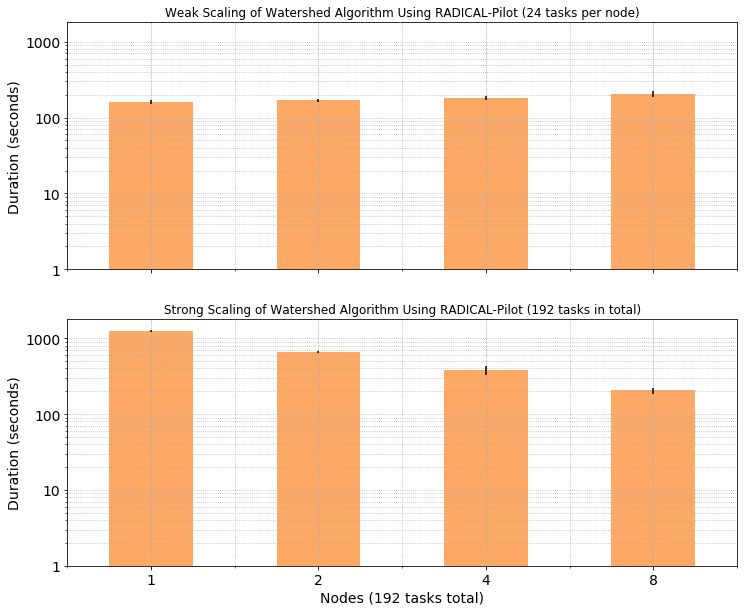

In [3]:
fig,axes = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=True)
fig.set_size_inches(12,10)
width = 0.2

pivot_kwargs = {
    'columns' : 'Nodes',
    'aggfunc' : lambda x : (sum(x) / len(x))
}

shared_kwargs = {'kind'     : 'bar',
                 'x'        : 'Nodes',
                 'y'        : 'mean',
                 'yerr'     : 'std',
                 'color'    : oranges(100),
                 'legend'   : False,
                 'log'      : True,
                 'fontsize' : 14
                }

weak_title      = {'title'  : 'Weak Scaling of Watershed Algorithm Using RADICAL-Pilot (24 tasks per node)','ax':axes[0]}
weak_kwargs     = merge_dicts(shared_kwargs, weak_title)
weakdf_grouped  = weakdf.pivot_table(**pivot_kwargs).transpose().reset_index()
weak_scale_plot = weakdf_grouped.plot(**weak_kwargs)
weak_scale_plot.set_ylabel('Duration (seconds)',fontsize=14)
weak_scale_plot.set_yticks([1, 10, 100, 1000])
weak_scale_plot.set_yticklabels(['1','10','100','1000'],fontsize=14)
weak_scale_plot.grid('on',which='both',linestyle=':')


strong_title      = {'title'  : 'Strong Scaling of Watershed Algorithm Using RADICAL-Pilot (192 tasks in total)','ax':axes[1]}
strong_kwargs     = merge_dicts(shared_kwargs, strong_title)
strongdf_grouped  = strongdf.pivot_table(**pivot_kwargs).transpose().reset_index()
strong_scale_plot = strongdf_grouped.plot(**strong_kwargs)
strong_scale_plot.set_ylabel('Duration (seconds)',fontsize=14)
strong_scale_plot.set_xlabel('Nodes (192 tasks total)',fontsize=14)
strong_scale_plot.set_yticks([1, 10, 100, 1000])
strong_scale_plot.set_yticklabels(['1','10','100','1000'],fontsize=14)
strong_scale_plot.set_xticklabels(['1','2','4','8'],rotation=0,fontsize=14)
strong_scale_plot.grid('on',which='both',linestyle=':')